# **Dimensionality Reduction**

En `video-features.ipynb` se pudo extraer las caracteristicas de los videos del dataset `test_subset_10.csv`, `train_subset_10.csv` y `val_subset_10.csv`, de manera que, cada vector característico se almacenó en un archivo `${youtube_id}.npy`(dentro de la carpeta 'extraction')

## **Load packages**

In [2]:
# librerías:
# !pip install numpy pandas scikit-learn matplotlib

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os

## **Load datasets**

In [6]:
train_path = "./data/train_subset_10.csv"
val_path = "./data/val_subset_10.csv"
test_path = "./data/test_subset_10.csv"

train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

## **Useful functions**

In [7]:
def get_X_y_id(path: str, df:pd.DataFrame, is_train:bool=True):

    """
    Description:
        This function returns the feature_vectors, labels an ids of the videos

    Args: 
        path (str): the path to the directory where the videos are located
        df (pd.DataFrame): a DataFrame of Pandas, could be train_df, val_df or test_df
        is_train (bool): if True, the function returns the feature_vectors, labels an ids of the videos

    """

    feature_vectors = []
    labels = []
    ids = []

    for video in Path(path).glob('*.npy'):
        
        id = os.path.basename(video).split('_')[0]

        if id not in df['youtube_id'].values:
            continue

        current_video = np.load(video)
        feature_vectors.append(np.mean(current_video, axis = 0)) # CHECK
        ids.append(id)

        if is_train:
            labels.append(df[df['youtube_id'] == id]['label'].values[0])

    feature_vectors = pd.DataFrame(np.vstack(feature_vectors))
    ids = pd.DataFrame({'youtube_id': ids})
    labels = pd.DataFrame(np.vstack(labels))

    
    if is_train:
        return feature_vectors, labels, ids
    else:
        return feature_vectors, ids


In [8]:
path_train = './extraction/train/r21d/r2plus1d_18_16_kinetics'
path_val = './extraction/val/r21d/r2plus1d_18_16_kinetics'
path_test = './extraction/test/r21d/r2plus1d_18_16_kinetics'


In [9]:
# X_train, y_train, ids_train = get_X_y_id(path_train, train_df)
X_val, y_val, ids_val = get_X_y_id(path_val, val_df)
# X_test, y_test, ids_test = get_X_y_id(path_test, test_df, False)

In [10]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.983179,0.327599,0.782543,1.001214,1.577275,0.340752,1.618470,1.223442,0.823669,0.681321,...,0.737517,0.705552,1.096622,0.711036,0.974399,0.668527,0.925978,0.582594,1.312039,2.023441
1,1.061987,0.605783,0.573484,0.550123,1.083703,0.436514,0.986723,0.237259,0.870769,0.636464,...,0.710814,1.498515,0.875496,1.125336,2.201024,1.377259,1.261040,0.406046,0.522262,0.986933
2,2.448404,1.147437,1.186966,0.792676,0.788874,0.292240,0.791563,0.512280,0.616745,0.588685,...,1.055853,1.433681,2.381611,0.469194,0.610362,2.227937,1.419250,0.234973,0.533393,0.299416
3,0.312113,0.368528,0.241799,0.789037,0.732306,0.635243,1.188323,0.714574,1.577718,1.490716,...,1.056502,0.055957,1.616206,1.442354,0.660173,0.921523,0.043679,0.595073,1.019820,0.219829
4,0.232415,0.736968,0.989492,0.516418,0.407583,0.240481,0.723166,1.121362,0.571783,0.914052,...,0.694645,0.176282,0.564752,1.375056,0.592111,0.756491,0.426875,0.457333,1.180734,0.757165


In [42]:
y_val.head()

,0
0,flipping pancake
1,wrapping present
2,stretching leg
3,stretching leg
4,shot put


In [43]:
ids_val.head()

,youtube_id
0,--33Lscn6sk
1,-0WZKTu0xNk
2,-2VKVjgNuE0
3,-2VXhGGeOWg
4,-2zDnjMmI5U


De esta manera, la fila 0 de X, y, id se corresponden, lo mismo para la fila 1, 2, ...

In [44]:
print(X_val.shape)
print(y_val.shape)  
print(ids_val.shape)

(426, 512)
(426, 1)
(426, 1)


In [45]:
X_val

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.983179,0.327599,0.782543,1.001214,1.577275,0.340752,1.618470,1.223442,0.823669,0.681321,...,0.737517,0.705552,1.096622,0.711036,0.974399,0.668527,0.925978,0.582594,1.312039,2.023441
1,1.061987,0.605783,0.573484,0.550123,1.083703,0.436514,0.986723,0.237259,0.870769,0.636464,...,0.710814,1.498515,0.875496,1.125336,2.201024,1.377259,1.261040,0.406046,0.522262,0.986933
2,2.448404,1.147437,1.186966,0.792676,0.788874,0.292240,0.791563,0.512280,0.616745,0.588685,...,1.055853,1.433681,2.381611,0.469194,0.610362,2.227937,1.419250,0.234973,0.533393,0.299416
3,0.312113,0.368528,0.241799,0.789037,0.732306,0.635243,1.188323,0.714574,1.577718,1.490716,...,1.056502,0.055957,1.616206,1.442354,0.660173,0.921523,0.043679,0.595073,1.019820,0.219829
4,0.232415,0.736968,0.989492,0.516418,0.407583,0.240481,0.723166,1.121362,0.571783,0.914052,...,0.694645,0.176282,0.564752,1.375056,0.592111,0.756491,0.426875,0.457333,1.180734,0.757165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.471385,1.864226,0.758726,0.250249,0.698530,0.184026,0.393555,0.814039,0.382516,0.595623,...,0.515278,0.389581,0.756598,0.406351,1.612016,1.036590,0.624423,0.244819,1.272007,0.774926
422,0.372373,0.468818,0.288156,0.850860,0.223775,1.764237,1.640161,0.647509,0.529016,1.093031,...,1.206651,1.084583,1.074124,0.287029,0.609291,0.707198,0.336469,0.910549,1.855209,0.601719
423,0.819940,0.320556,0.625500,0.360067,0.775978,0.862315,1.264172,0.679567,2.368191,0.646982,...,1.150813,0.518849,0.964219,0.231664,0.279316,0.311475,0.522284,1.002905,0.281599,0.711998
424,0.537856,2.090562,1.975631,1.399311,0.433596,0.598942,0.670525,1.347125,0.587638,0.509851,...,0.731771,0.813013,1.236891,1.369831,0.945642,1.476456,0.953919,0.620790,1.505530,1.316198


## **Utils: Save and load processed (averaged) features**

Guardar los features promediados en archivos npz, para poder cargarlos cada vez que se necesiten.

In [11]:
def save_df_as_npz(directory, filename, features, ids, labels=None):
    """
    Description:
        This function saves the feature vectors, ids and labels as npz files.
        Ej: en test.npz estará una matriz con los features y un array con sus
        respectivas labels.

    Args: 
        features (pd.DataFrame): the feature vectors
        labels (pd.DataFrame): the labels
        directory (str): the directory where the npz files will be saved
        filename (str): the name of the npz file

    """
    features = features.to_numpy()
    ids = ids.to_numpy()
    if labels is not None:
        labels= labels.to_numpy()
        np.savez(os.path.join(directory, filename), features=features, ids=ids, labels=labels)
    else:
        np.savez(os.path.join(directory, filename), features=features, ids=ids)

def load_features_ids_labels(filename, has_labels=True):
    """
    Description:
        Cargar los features, ids y labels de un archivo npz.
        Si es data de testeo, has_labels=False
    """
    contents = np.load(filename, allow_pickle=True)
    features = contents['features']
    ids = contents['ids']
    if has_labels:
        labels = contents['labels']
        return features, ids, labels
    return features, ids

In [12]:
# Guardar (crear carpeta 'features_np' si no existe)
# Validation
save_df_as_npz(features=X_val, ids=ids_val, labels=y_val, directory='features_np', filename='features_val.npz')
# Test
# save_df_as_npz(directory='features_np', filename='features_test.npz', features=X_test, ids=ids_test)
# Train
# save_df_as_npz(directory='features_np', filename='features_train.npz', features=X_train, ids=ids_train, labels=y_train)


In [13]:
# Ejemplo para cargar los features guardados
X_val_np, ids_val_np, y_val_np = load_features_ids_labels(filename='features_np/features_val.npz', has_labels=True)

## **Reduce dimensionality**

Con los features ya procesados, probar técnicas de reducción de dimensionalidad

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

### **t-SNE**

Shape after t-SNE w/ 2 components: (426, 2)


Text(0.5, 1.0, 'Scatterplot after t-SNE')

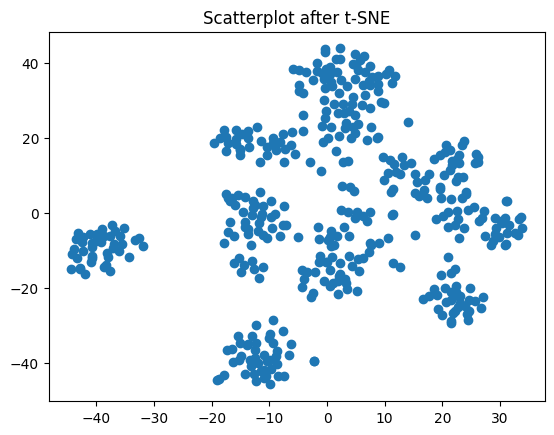

In [29]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=0, perplexity=10)
val_tsne = tsne.fit_transform(X_val_np)
print("Shape after t-SNE w/ 2 components:", val_tsne.shape)

plt.scatter(val_tsne[:, 0], val_tsne[:, 1])
plt.title('Scatterplot after t-SNE')

### **PCA**


Shape after PCA w/ 2 components: (426, 2)


Text(0.5, 1.0, 'Scatterplot after PCA')

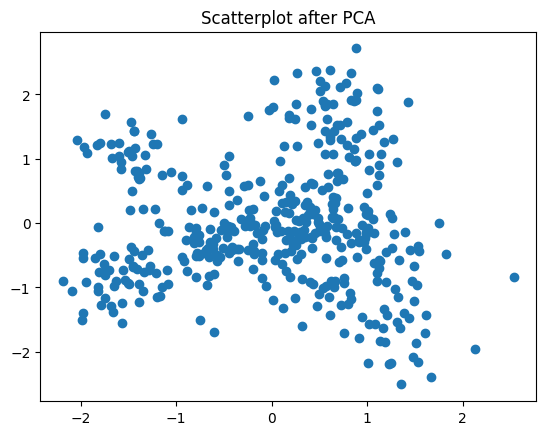

In [32]:
pca = PCA(n_components=2)
val_pca = pca.fit_transform(X_val_np)
print("Shape after PCA w/ 2 components:", val_pca.shape)

plt.scatter(val_pca[:, 0], val_pca[:, 1])
plt.title('Scatterplot after PCA')

### **LDA**

shape of LDA: (426, 2)


Text(0.5, 1.0, 'Scatterplot after LDA')

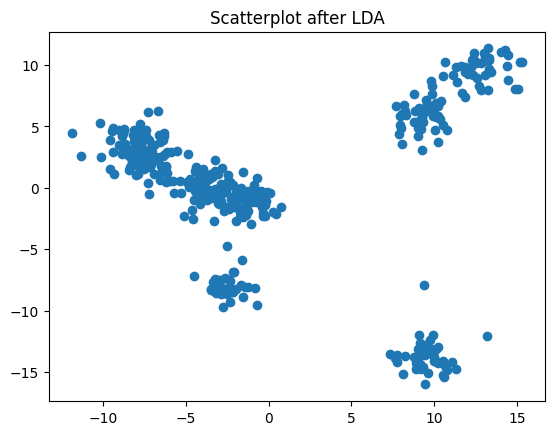

In [37]:
lda = LinearDiscriminantAnalysis(n_components=2)
val_lda = lda.fit_transform(X_val_np, y_val_np.flatten())
print('shape of LDA:', val_lda.shape)

plt.scatter(val_lda[:, 0], val_lda[:, 1])
plt.title('Scatterplot after LDA')